# Assignment 2

## Question 1

In [72]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [161]:
data = pd.read_csv("/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/2_Semester/ML/Assignments/machine_learning/Assignment_2/data.csv")

#drop Diigo as column has bad data quality, contains "Error: value not found" several timey
data.drop('Diigo', axis=1, inplace=True)


In [165]:
# Create a boolean mask for values above 1000 (excluding the first column)
mask = (data.iloc[:, 1:] > 1000).any(axis=1)

# Use the boolean mask to filter row
data = data.drop(data[mask].index)

In [167]:
#split the data
#drop Diigo as column has bad data quality, contains "Error: value not found" several timey
X = data.drop(['Unnamed: 0','Click'], axis=1)
Y = data['Click']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print("X - Training Data Shape:", X_train.shape)
print("X - Testing Data Shape:", X_test.shape)

X - Training Data Shape: (7999, 80)
X - Testing Data Shape: (2000, 80)


### 1.1 Support Vector Machine

accuracy_score: 0.959 

Classifiaction Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1704
           1       0.97      0.75      0.84       296

    accuracy                           0.96      2000
   macro avg       0.96      0.87      0.91      2000
weighted avg       0.96      0.96      0.96      2000

Cross validation train_score 0.9663082561728394
Cross validation test_score [0.959375   0.965625   0.9575     0.96625    0.96247655]

Confusion Matrix



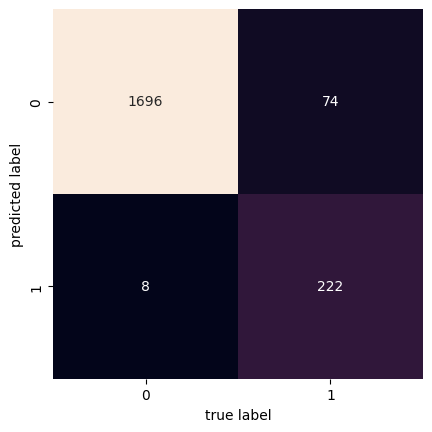

In [186]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

svc = SVC(kernel='linear',class_weight='balanced',random_state=42)

svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

#Accuracy Score
print('accuracy_score:',accuracy_score(svc_pred, y_test),"\n")

#Calssifiaction Report
print("Classifiaction Report:\n",classification_report(svc_pred, y_test))

#Cross Validation
cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5,return_train_score=True)
print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'])

#heatmap confusion matrix
print("\nConfusion Matrix\n")
mat = confusion_matrix(svc_pred,y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 1.1 Random Forest

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1994
           1       0.03      1.00      0.05         6

    accuracy                           0.89      2000
   macro avg       0.51      0.94      0.50      2000
weighted avg       1.00      0.89      0.94      2000



<Axes: >

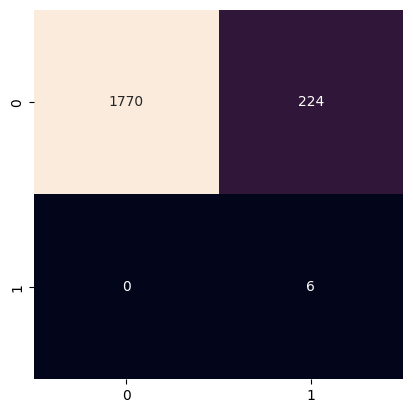

In [173]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

#Print classification report for this classifier:
print(metrics.classification_report(ypred, y_test))

#confusion matrix as heatmap
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


### 1.2 Feature Importance

Text(0.5, 1.0, 'Top 5 Features')

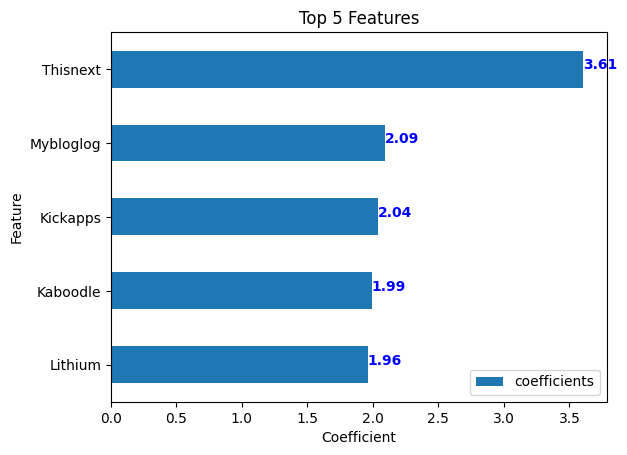

In [218]:
# get top 5 features
top_features = pd.DataFrame(abs(svm.coef_[0]), index=X.columns, columns=["coefficients"]).nlargest(5, "coefficients").sort_values("coefficients", ascending=True)

# Plot the top features
ax = top_features.plot(kind='barh')

# Add coefficient values to the plot
for i, v in enumerate(pd.Series(abs(svm.coef_[0]), index=X.columns).nlargest(5).sort_values(ascending=True)):
    ax.text(v, i, str(round(v, 2)), color='blue', fontweight='bold')

plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')


### 1.3

In [237]:
#costs per channel
#mean not necessary as each channel was used for each ad, thus you would always divide by same number
costs = X*0.1

sum_cost = costs.sum().round(4)
sum_cost = pd.DataFrame(sum_cost)
sum_cost.rename(columns={0: "costs"}, inplace=True)

#join costs with top feature df from 1.2
joined_df = top_features.join(sum_cost)
joined_df

#importance vs cost coefficient
joined_df["Iportance vs Costs"] = joined_df["coefficients"] / joined_df["costs"]
joined_df
joined_df = joined_df.sort_values(by='Iportance vs Costs', ascending=False)
joined_df

#Lithium and Kickapps are recommendet to used based on importance and costs


,coefficients,costs,Iportance vs Costs
Lithium,1.962043,18.9,0.103812
Kickapps,2.037108,44.2,0.046088
Thisnext,3.605992,201.9,0.017860
Kaboodle,1.991884,274.6,0.007254
Mybloglog,2.093864,302.9,0.006913
